# Sygnały akustyczne

## Laboratorium 04 - Przykład projektowania filtra FIR (SOI)

Karol Działowski

Celem zadania było tworzenie filtra o skończonej odpowiedzi impulsowej i zbadanie wpływu rodzaju okna i rzędu filtra na charakterystyki częstotliwościowe zaproponowanych filtrów.

## Zadanie 1

Zaprojektuj filtr FIR (SOI) dolnoprzepustowy dowolnie wybranego rzędu, dla zadanej częstotliwości granicznej leżącej w zakresie od 500 Hz do 2 kHz, częstotliwości próbkowania Fs=48 kHz dla okna prostokątnego i dowolnie wybranej funkcji okna (Blackmanna, Hanninga, Hamminga).

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, fftshift

def fir(fs, n, fc, window='hamming'):
    """
    Tworzenie filtru FIR
    fs: częstotliwość próbkowania
    n: rząd filtra
    fc: częstotliwość odcięcia
    """
    b = signal.firwin(n, cutoff=fc, fs=fs, window=window, pass_zero="lowpass")
    w, h = signal.freqz(b, fs)
    return b, w, h

fs = 48000  # czestotliwosc probkowania
n = 101  # rzad filtra
fc = 2130  # czestotliwosc odciecia
b, w, h = fir(fs, n, fc)

## Zadanie 2.1

Porównaj wykresy funkcji okien.

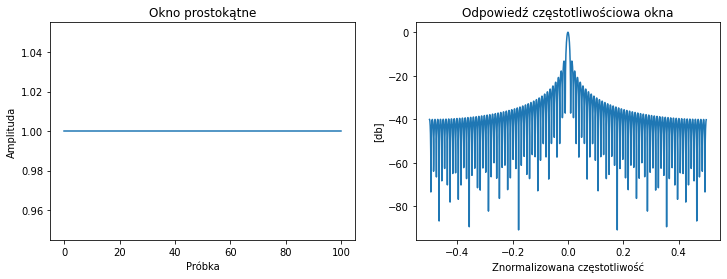

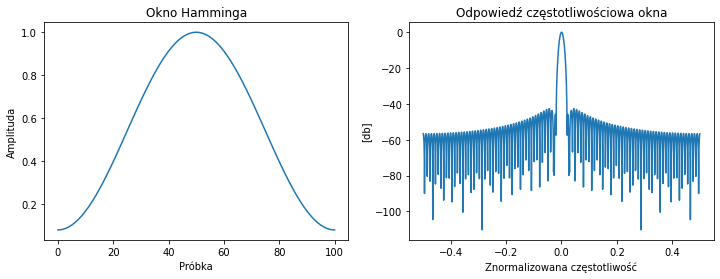

In [15]:
def plot_window(window, title):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    # wykres okna hamminga
    axes[0].plot(window)
    axes[0].set_title(title)
    axes[0].set_ylabel("Amplituda")
    axes[0].set_xlabel("Próbka")
    # wykres odpowiedzi czestotliwosciowej okna hamminga
    a = fft(window, 2048) / (len(window) / 2.0)
    freq = np.linspace(-0.5, 0.5, len(a))
    response = 20 * np.log10(np.abs(fftshift(a / abs(a).max())))
    axes[1].plot(freq, response)
    #axes[1].set_axis([-0.5, 0.5, -120, 0])
    axes[1].set_title("Odpowiedź częstotliwościowa okna")
    axes[1].set_ylabel("[db]")
    axes[1].set_xlabel("Znormalizowana częstotliwość")
    plt.show()

window_boxcar = signal.windows.boxcar(n)
plot_window(window_boxcar, "Okno prostokątne")
window_hamming = signal.windows.hamming(n)
plot_window(window_hamming, "Okno Hamminga")

## Zadanie 2.2

Odpowiedź impulsowa

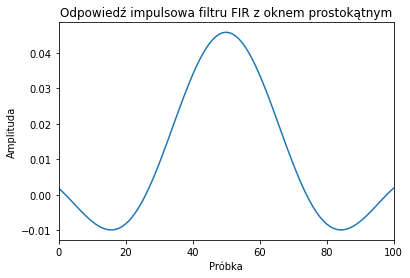

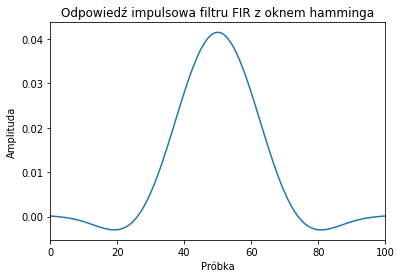

In [34]:
def impulse_response(b, title):
    fig = plt.figure()
    plt.plot(b)
    plt.title(title)
    plt.xlabel('Próbka')
    plt.ylabel('Amplituda')
    plt.xlim([0, 100])

b_box, w_box, h_box = fir(fs, n, fc, 'boxcar')
b_hamm, w_hamm, h_hamm = fir(fs, n, fc, 'hamming')
impulse_response(b_box, 'Odpowiedź impulsowa filtru FIR z oknem prostokątnym')
impulse_response(b_hamm, 'Odpowiedź impulsowa filtru FIR z oknem hamminga')

## Zadanie 2.3

Wykresy charakterystyk impulsowych.

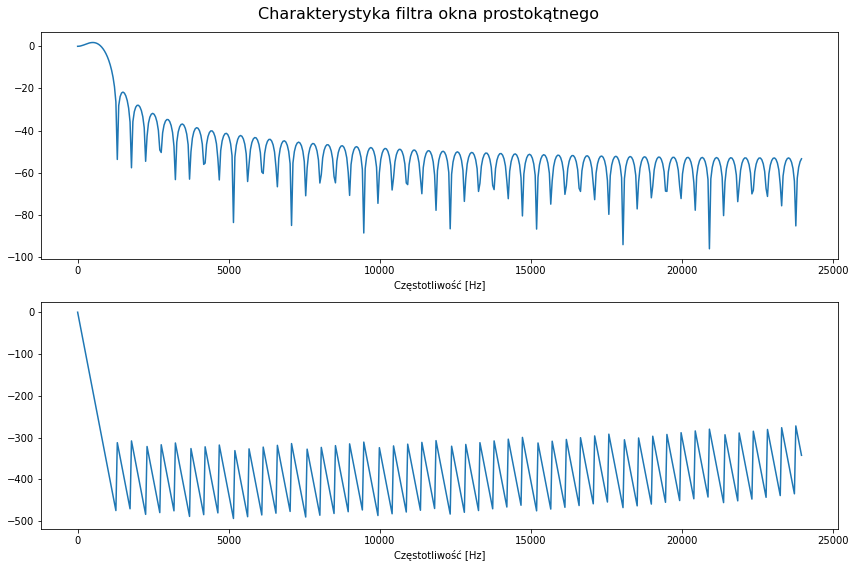

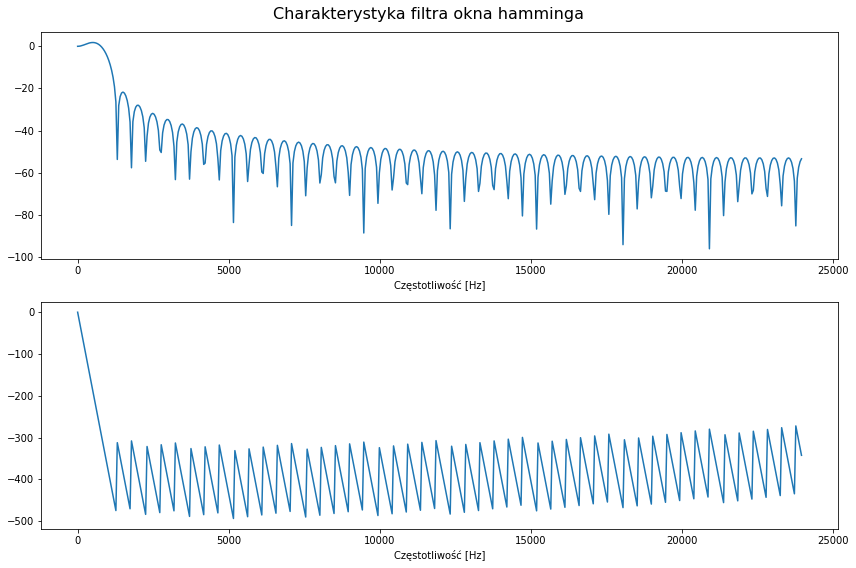

In [39]:
def filter_characteristics(h, fs, title):
    fig, axes = plt.subplots(2, 1, figsize=(12, 8))
    # Wykres charakterystyki amplitudowej
    x = w * fs / (2 * np.pi)
    y = 20 * np.log10(np.abs(h))
    axes[0].plot(x, y)
    axes[0].set_xlabel("Częstotliwość [Hz]")
    # Wykres charakterystyki fazowej
    y = np.arctan2(np.imag(h), np.real(h))
    y = np.degrees(np.unwrap(y))
    axes[1].plot(x, y)
    axes[1].set_xlabel("Częstotliwość [Hz]")
    fig.suptitle(f'Charakterystyka filtra {title}', fontsize=16)
    plt.tight_layout()
    plt.show()

filter_characteristics(h_box, fs, "okna prostokątnego")
filter_characteristics(h_box, fs, "okna hamminga")

## Zadanie 3

Porównanie charakterystyk amplitudowych dla różnych rzędów filtra.

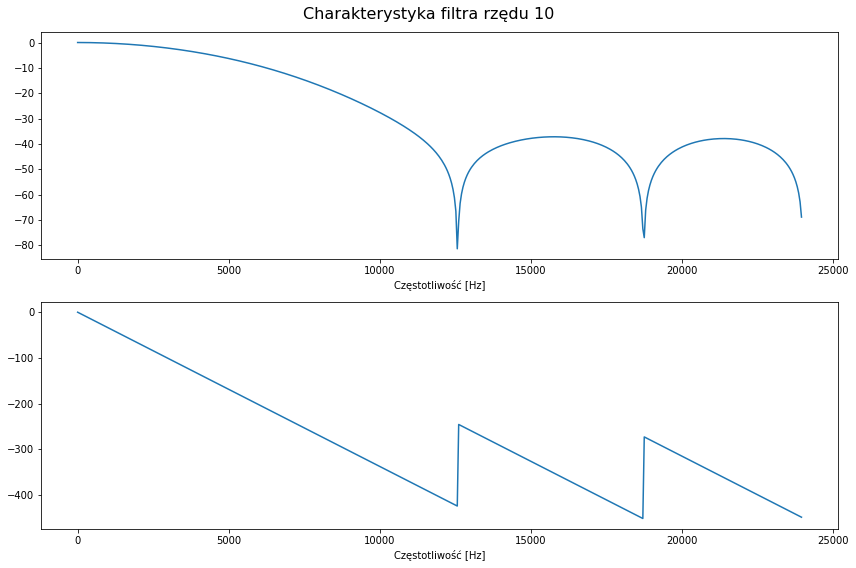

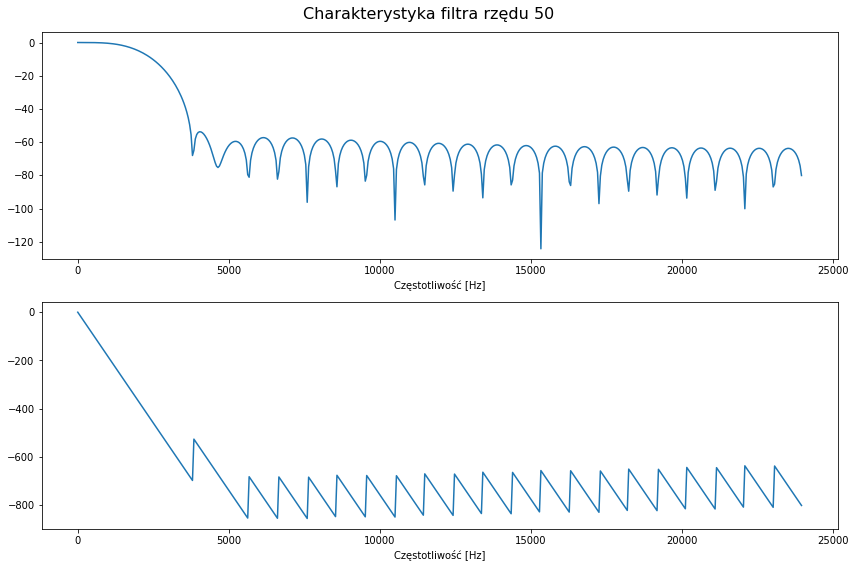

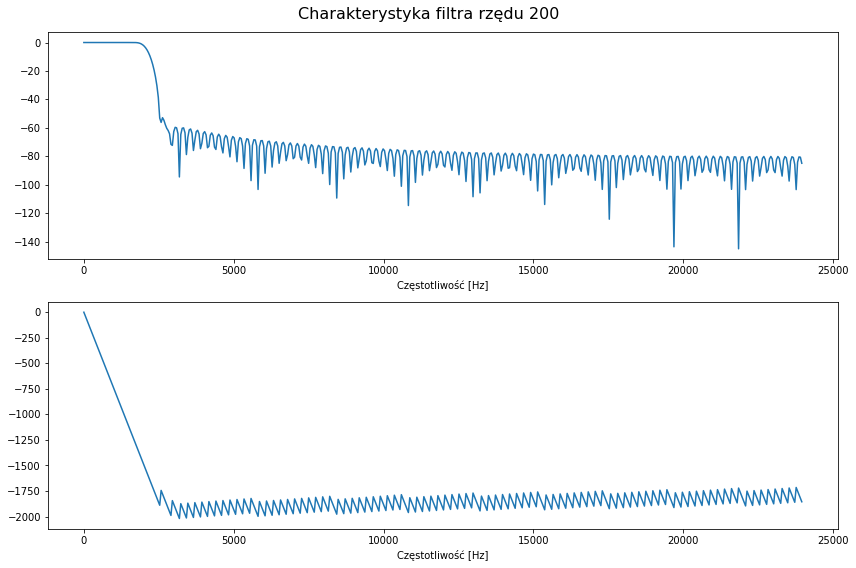

In [40]:
_, _, h_10 = fir(fs, 10, fc, 'hamming')
_, _, h_50 = fir(fs, 50, fc, 'hamming')
_, _, h_200 = fir(fs, 200, fc, 'hamming')

filter_characteristics(h_10, fs, 'rzędu 10')
filter_characteristics(h_50, fs, 'rzędu 50')
filter_characteristics(h_200, fs, 'rzędu 200')

## Wnioski

Wraz ze zwiększeniem rzędu filtra uzyskuje się mniejszy zakres stanu przejściowego w filtrze (moment odcięcia częstotliwości jest bardziej zbliżony do idealnego filtra). Kosztem zwiększenia rzędu filtra jest złożoność obliczeniowa filtracji takim filtrem.